<h2 style= "font-size:3rem;color:DarkCyan"> Creating Impulse resonses using a Feedback Delay Network</h2>


Algorithmic reverb using a 4x4 FDN

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
from random import random

Creating impuls to visualize impulse response of the algorithm

In [42]:
sr = 44100
x = np.zeros(sr*5) 
x[0] = 1


Initiazing matrix, delays and buffers

In [43]:
g = [[0,1,1,0],
     [-1,0,0,-1], 
     [1,0,0,-1], 
     [0,1,-1,0]]

delays = [1571, 2053, 2719, 3463];

buffers = [np.zeros(delays[0]), np.zeros(delays[1]), np.zeros(delays[2]), np.zeros(delays[3])]
feedbacks = [0,0,0,0]
delay_inputs = [0,0,0,0]
delay_outputs = [0,0,0,0]

number_of_IRs = 100
y = np.zeros((len(x), number_of_IRs))
feedback_gains = np.zeros(number_of_IRs)
print(np.shape(y))


(220500, 100)


Delay line

In [44]:
def DelayLine(x, buffer, n, delay_length_samples, max_delay_length):    
    idxR = (n - delay_length_samples) %  max_delay_length # Read index
    y = buffer[idxR]
    idxW = n % max_delay_length # write index
    buffer[idxW] = x
    
    return y, buffer

Going through sample by sample

In [45]:
for r in range(0, number_of_IRs):
    
    feedback_gain = random() * 0.70
    #print(feedback_gain)
    feedback_gains[r] = feedback_gain
    
    buffers = [np.zeros(delays[0]), np.zeros(delays[1]), np.zeros(delays[2]), np.zeros(delays[3])]
    feedbacks = [0,0,0,0]
    delay_inputs = [0,0,0,0]
    delay_outputs = [0,0,0,0]
    
    for n in range(0,len(x)):
        for i in range(0,4):
            delay_inputs[i] = x[n] + feedbacks[i]
            delay_outputs[i] , buffers[i] = DelayLine(delay_inputs[i], buffers[i], n,  delays[i], delays[i])

        for i in range(0,4):
            y[n][r] += delay_outputs[i]
            feedbacks[i] = feedback_gain * (g[0][i] * delay_outputs[0]+ g[1][i] * delay_outputs[1] + g[2][i] * delay_outputs[2] + g[3][i] * delay_outputs[3])
            

Plot impulse response

(220500, 100)


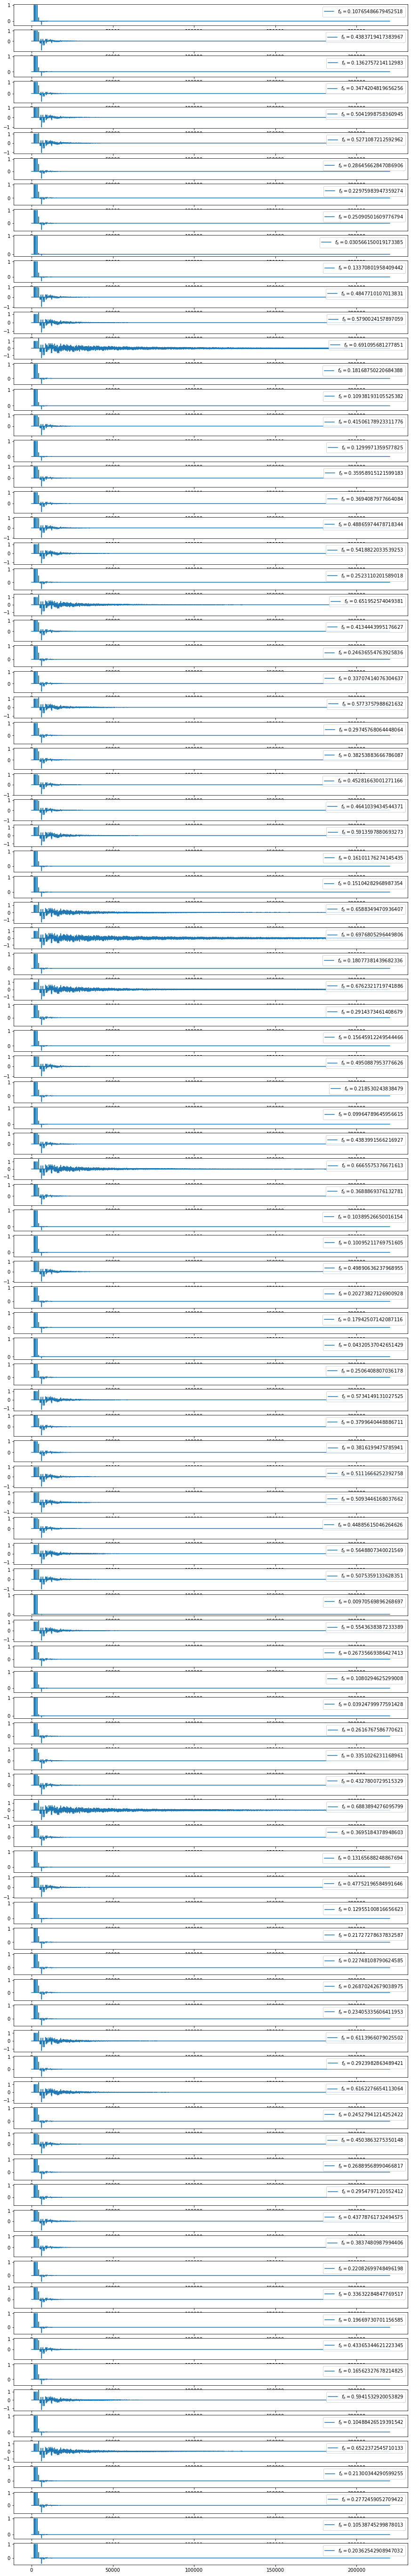

In [46]:
t = np.arange(0,sr*5)

IR = y.T
print(np.shape(y))

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(100)
plt.tight_layout()

idx = 1
for r in range(0, number_of_IRs):
    
    #plt.subplot(number_of_IRs,2 , idx)
    
    #idx+=1
   # im = plt.imshow(feedback_matrix[r], cmap="coolwarm")
   # plt.ylabel(f'$g {r}$')
   # plt.colorbar(im)
    
    plt.subplot(number_of_IRs,1, idx)
    plt.plot(t, IR[r], label = f'$f_b = ${feedback_gains[r]}')
    idx+=1
    plt.legend(loc='upper right')
    #plt.ylabel(f'{feedback_gains[r]}')

In [50]:
# save data to file

#merging everything into a single data structure
dataset = pd.DataFrame(IR)
dataset['feedback_gain'] = feedback_gains
dataset.to_csv('dataset.csv')
dataset

,0,1,2,3,4,5,6,7,8,9,...,220491,220492,220493,220494,220495,220496,220497,220498,220499,feedback_gain
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.504054e-78,0.0,-1.666971e-81,0.0,1.292518e-63,0.0,-1.070469e-66,0.0,9.718300e-66,0.107655
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.424164e-21,0.0,-2.306065e-22,0.0,1.727031e-18,0.0,-3.932150e-19,0.0,8.767823e-19,0.438372
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-8.327647e-69,0.0,-1.423098e-71,0.0,4.874313e-56,0.0,-1.036550e-58,0.0,7.433983e-58,0.136276
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.405517e-31,0.0,-3.752988e-32,0.0,5.810936e-26,0.0,-5.219997e-27,0.0,1.468470e-26,0.347420
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-6.975886e-16,0.0,-1.760520e-16,0.0,5.411142e-14,0.0,-2.150335e-14,0.0,4.183179e-14,0.504200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.529944e-05,0.0,-1.067829e-05,0.0,5.843455e-06,0.0,1.209731e-05,0.0,2.099810e-05,0.652237
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.133608e-51,0.0,-9.287349e-53,0.0,1.100412e-41,0.0,-1.396704e-43,0.0,6.408669e-43,0.213003
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.078011e-40,0.0,-1.179057e-41,0.0,3.258109e-33,0.0,-1.186940e-34,0.0,4.184212e-34,0.277246
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.458414e-79,0.0,-2.114401e-82,0.0,2.675004e-64,0.0,-2.034617e-67,0.0,1.886878e-66,0.105387
